# 安裝 yfinance
!pip install yfinance

In [1]:
import yfinance

In [2]:
import numpy as np
import talib
from talib import abstract
import pandas as pd

In [19]:
# 透過『get_functions』語法，查看 TA-Lib 提供的所有技術指標的代碼
all_ta_label = talib.get_functions()
# 看一下清單
# all_ta_label

In [4]:

# 取得 AAPL 價量資料
df = yf.Ticker('0050.TW').history(period = '2008-01-14')
df.head()

df = df.rename(columns={'Open': 'open','High': 'high','Low': 'low','Close': 'close','Volume': 'volume'})
df = df[df.columns[:5]] 
df.head(10)

,open,high,low,close,volume
Date,,,,,
2021-06-30,138.100006,139.350006,138.050003,138.949997,9723717


In [76]:
talib.ADX(df.high, df.low, df.close, timeperiod = 2) #取得指標的第一種方法

Date
1980-12-12          NaN
1980-12-15          NaN
1980-12-16          NaN
1980-12-17    68.751767
1980-12-18    45.093107
                ...    
2021-06-21    47.236378
2021-06-22    50.650278
2021-06-23    56.049593
2021-06-24    64.532920
2021-06-25    52.883286
Length: 10221, dtype: float64

In [97]:
ADX = abstract.ADX(df, timperiod = 2) # 取得指標的第二種方法
ADX

Date
1980-12-12          NaN
1980-12-15          NaN
1980-12-16          NaN
1980-12-17          NaN
1980-12-18          NaN
                ...    
2021-06-21    15.444068
2021-06-22    16.042094
2021-06-23    16.695938
2021-06-24    17.438473
2021-06-25    18.036014
Length: 10221, dtype: float64

In [139]:

# 確認價量資料表 df 的值都是 float 格式
df = df.astype('float')
print(df)
# 準備一份你想要計算並且併入 df 的技術指標清單
# ta_list = ['MACD','RSI']
# 這裡示範全部 158 種技術指標
ta_list = talib.get_functions()

# 迴圈執行，看看結果吧！
for x in ta_list[:]:
    try:
        # x 為技術指標的代碼，透過迴圈填入，再透過 eval 計算出 output
        output = eval('abstract.'+x+'(df)')
        # 如果輸出是一維資料，幫這個指標取名為 x 本身；多維資料則不需命名
        output.name = x.lower() if type(output) == pd.core.series.Series else None
        # 透過 merge 把輸出結果併入 df DataFrame
        output = pd.DataFrame(output)
        
        for y in output.columns:
            df[y] =output[y]
#             print(df.columns)
#         df = pd.merge(df, pd.DataFrame(output))
#         print(df)
#         df = df.set_index('key_0')
#         print(df)
#         output = eval('abstract.'+x+'(df)')
#         output.name = x.lower() if type(output) == pd.core.series.Series else None
#         print(output)
    except:
        print(x)

                  open        high         low       close       volume
Date                                                                   
1980-12-12    0.100751    0.101189    0.100751    0.100751  469033600.0
1980-12-15    0.095933    0.095933    0.095495    0.095495  175884800.0
1980-12-16    0.088923    0.088923    0.088485    0.088485  105728000.0
1980-12-17    0.090676    0.091114    0.090676    0.090676   86441600.0
1980-12-18    0.093304    0.093742    0.093304    0.093304   73449600.0
...                ...         ...         ...         ...          ...
2021-06-21  130.300003  132.410004  129.210007  132.300003   79663300.0
2021-06-22  132.130005  134.080002  131.619995  133.979996   74783600.0
2021-06-23  133.770004  134.320007  133.229996  133.699997   60214200.0
2021-06-24  134.449997  134.639999  132.929993  133.410004   68711000.0
2021-06-25  133.460007  133.889999  132.809998  133.110001   70730700.0

[10221 rows x 5 columns]
MAVP


In [140]:
df

,open,high,low,close,volume,ht_dcperiod,ht_dcphase,inphase,quadrature,sine,...,linearreg_slope,stddev,tsf,var,atr,natr,trange,ad,adosc,obv
Date,,,,,,,,,,,,,,,,,,,,,
1980-12-12,0.100751,0.101189,0.100751,0.100751,469033600.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-4.690336e+08,NaN,4.690336e+08
1980-12-15,0.095933,0.095933,0.095495,0.095495,175884800.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.005256,-6.449184e+08,NaN,2.931488e+08
1980-12-16,0.088923,0.088923,0.088485,0.088485,105728000.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.007009,-7.506464e+08,NaN,1.874208e+08
1980-12-17,0.090676,0.091114,0.090676,0.090676,86441600.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.002628,-8.370880e+08,NaN,2.738624e+08
1980-12-18,0.093304,0.093742,0.093304,0.093304,73449600.0,NaN,NaN,NaN,NaN,NaN,...,NaN,0.004229,NaN,0.000018,NaN,NaN,0.003067,-9.105376e+08,NaN,3.473120e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-21,130.300003,132.410004,129.210007,132.300003,79663300.0,19.574968,146.292743,2.915515,2.746247,0.554950,...,0.612923,1.009027,132.635494,1.018136,2.280286,1.723572,3.199997,4.272386e+10,3.540706e+07,1.616283e+11
2021-06-22,132.130005,134.080002,131.619995,133.979996,74783600.0,19.358670,160.420928,3.395930,-0.422139,0.335107,...,0.684483,1.378413,133.809339,1.900021,2.293124,1.711542,2.460007,4.279256e+10,5.965514e+07,1.617031e+11
2021-06-23,133.770004,134.320007,133.229996,133.699997,60214200.0,19.599759,163.115171,2.461966,-0.667781,0.290449,...,0.658725,1.290076,134.341866,1.664296,2.207187,1.650850,1.090012,4.278428e+10,6.151491e+07,1.616429e+11


<AxesSubplot:xlabel='Date'>

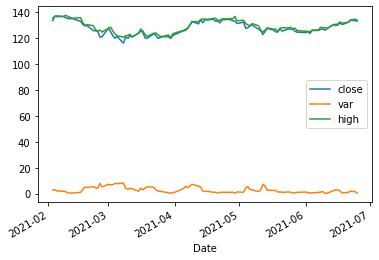

In [145]:
ax = df[-100:].plot(y='close', label='close')
df[-100:].plot(y='var', label='var', ax=ax)
df[-100:].plot(y='high', label='high', ax=ax)

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

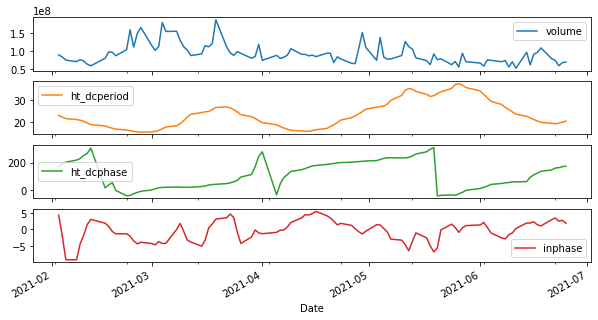

In [154]:
df.iloc[-100:,4:8].plot(subplots=True,figsize=(10, 5))